In [51]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import io
import math
import pandas as pd
import mplhep as hep

hep.style.use("ALICE")

In [52]:
def plot_syst(x, ex, y, ey, ax, color, width):
    for i in range(len(x)):
        box_x = x[i] - ex
        box_y = y[i] - ey[i]
        box_width = 2 * ex
        box_height = 2 * ey[i]
        rect = patches.Rectangle((box_x, box_y), box_width, box_height, fill=False, edgecolor=color, linewidth=width)
        ax.add_patch(rect)

In [53]:
dfSigJpsiVsPtCentr1050 = pd.read_csv('/Users/lucamicheletti/GITHUB/jpsi_flow_run3/results/sig_Jpsi_vs_pt_10_50_rebin.txt', sep=' ')
ptMin = dfSigJpsiVsPtCentr1050["x_min"]
ptMax = dfSigJpsiVsPtCentr1050["x_max"]
pt = (ptMin + ptMax) / 2.
errPt = (ptMax - ptMin) / 2.

sigJpsiVsPtCentr1050 = dfSigJpsiVsPtCentr1050["val"] / (2 * errPt)
statSigJpsiVsPtCentr1050 = dfSigJpsiVsPtCentr1050["stat"] / (2 * errPt)
systSigJpsiVsPtCentr1050 = dfSigJpsiVsPtCentr1050["syst"] / (2 * errPt)

dfSigJpsiVsPtCentr1030 = pd.read_csv('/Users/lucamicheletti/GITHUB/jpsi_flow_run3/results/sig_Jpsi_vs_pt_10_30.txt', sep=' ')
sigJpsiVsPtCentr1030 = dfSigJpsiVsPtCentr1030["val"] / (2 * errPt)
statSigJpsiVsPtCentr1030 = dfSigJpsiVsPtCentr1030["stat"] / (2 * errPt)
systSigJpsiVsPtCentr1030 = dfSigJpsiVsPtCentr1030["syst"] / (2 * errPt)

dfPass4SigJpsiVsPtCentr1030 = pd.read_csv('/Users/lucamicheletti/GITHUB/dq_fitter/analysis/LHC23_pass4_full/centrality_10_30/pt_dependence_narrow_bins/systematic_sig_Jpsi.txt', sep=' ')
ptMinPass4 = dfPass4SigJpsiVsPtCentr1030["x_min"]
ptMaxPass4 = dfPass4SigJpsiVsPtCentr1030["x_max"]
ptPass4 = (ptMinPass4 + ptMaxPass4) / 2.
errPtPass4 = (ptMaxPass4 - ptMinPass4) / 2.

sigJpsiPass4VsPtCentr1030 = dfPass4SigJpsiVsPtCentr1030["val"] / (2 * errPtPass4)
statSigJpsiPass4VsPtCentr1030 = dfPass4SigJpsiVsPtCentr1030["stat"] / (2 * errPtPass4)
systSigJpsiPass4VsPtCentr1030 = dfPass4SigJpsiVsPtCentr1030["syst"] / (2 * errPtPass4)

dfSigJpsiVsPtCentr3050 = pd.read_csv('/Users/lucamicheletti/GITHUB/jpsi_flow_run3/results/sig_Jpsi_vs_pt_30_50.txt', sep=' ')
sigJpsiVsPtCentr3050 = dfSigJpsiVsPtCentr3050["val"] / (2 * errPt)
statSigJpsiVsPtCentr3050 = dfSigJpsiVsPtCentr3050["stat"] / (2 * errPt)
systSigJpsiVsPtCentr3050 = dfSigJpsiVsPtCentr3050["syst"] / (2 * errPt)

df_sig_jpsi_vs_rap = pd.read_csv('/Users/lucamicheletti/GITHUB/jpsi_flow_run3/results/sig_Jpsi_vs_rap_10_50.txt', sep=' ')
rap_min = df_sig_jpsi_vs_rap["x_min"]
rap_max = df_sig_jpsi_vs_rap["x_max"]
rap = (rap_min + rap_max) / 2.
err_rap = (rap_max - rap_min) / 2.
sig_jpsi_vs_rap = df_sig_jpsi_vs_rap["val"]
stat_sig_jpsi_vs_rap = df_sig_jpsi_vs_rap["stat"]
syst_sig_jpsi_vs_rap = df_sig_jpsi_vs_rap["syst"]


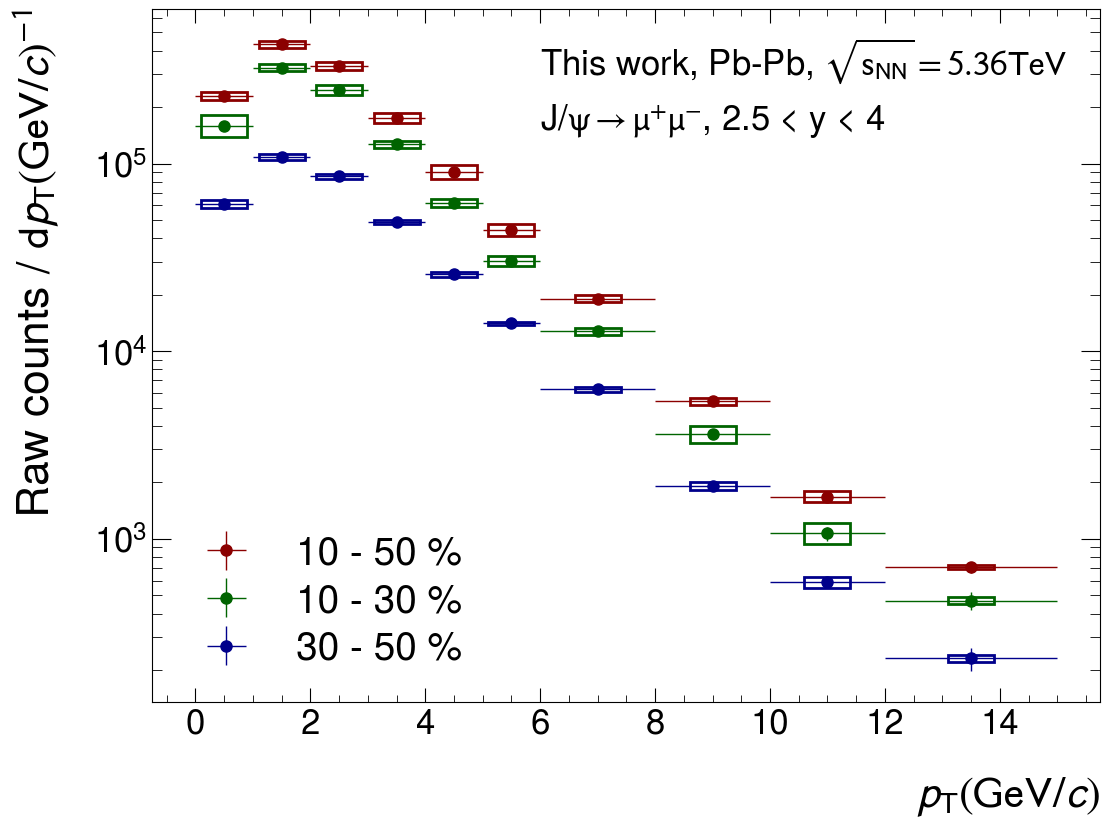

In [54]:
# Creating histogram
fig, ax = plt.subplots()
plot_syst(pt, 0.4, sigJpsiVsPtCentr1050, systSigJpsiVsPtCentr1050, ax, 'darkred', 2)
plot_syst(pt, 0.4, sigJpsiVsPtCentr1030, systSigJpsiVsPtCentr1030, ax, 'darkgreen', 2)
plot_syst(pt, 0.4, sigJpsiVsPtCentr3050, systSigJpsiVsPtCentr3050, ax, 'darkblue', 2)

plt.xlabel(r'$\it{p}_{\rm{T}} (\rm{GeV}/\it{c})$') 
plt.ylabel(r'Raw counts / $\rm{d}\it{p}_{\rm{T}} (\rm{GeV}/\it{c})^{-1}$') 
plt.yscale('log')
plt.errorbar(pt, sigJpsiVsPtCentr1050, xerr=errPt, yerr=statSigJpsiVsPtCentr1050, label="10 - 50 %", fmt='o', color='darkred', ecolor='darkred')
plt.errorbar(pt, sigJpsiVsPtCentr1030, xerr=errPt, yerr=statSigJpsiVsPtCentr1030, label="10 - 30 %", fmt='o', color='darkgreen', ecolor='darkgreen')
plt.errorbar(pt, sigJpsiVsPtCentr3050, xerr=errPt, yerr=statSigJpsiVsPtCentr3050, label="30 - 50 %", fmt='o', color='darkblue', ecolor='darkblue')
plt.legend(loc='lower left')
plt.text(6, 3e5, r'This work, Pb-Pb, $\sqrt{s_{\rm{NN}}} = 5.36 TeV$', fontsize=25)
plt.text(6, 1.5e5, r'J/$\psi\rightarrow\mu^{+}\mu^{-}$, 2.5 < y < 4', fontsize=25)
plt.savefig("/Users/lucamicheletti/GITHUB/jpsi_flow_run3/figures/sig_jpsi_vs_pt_vs_centrality.pdf", format="pdf", bbox_inches="tight")
plt.show()

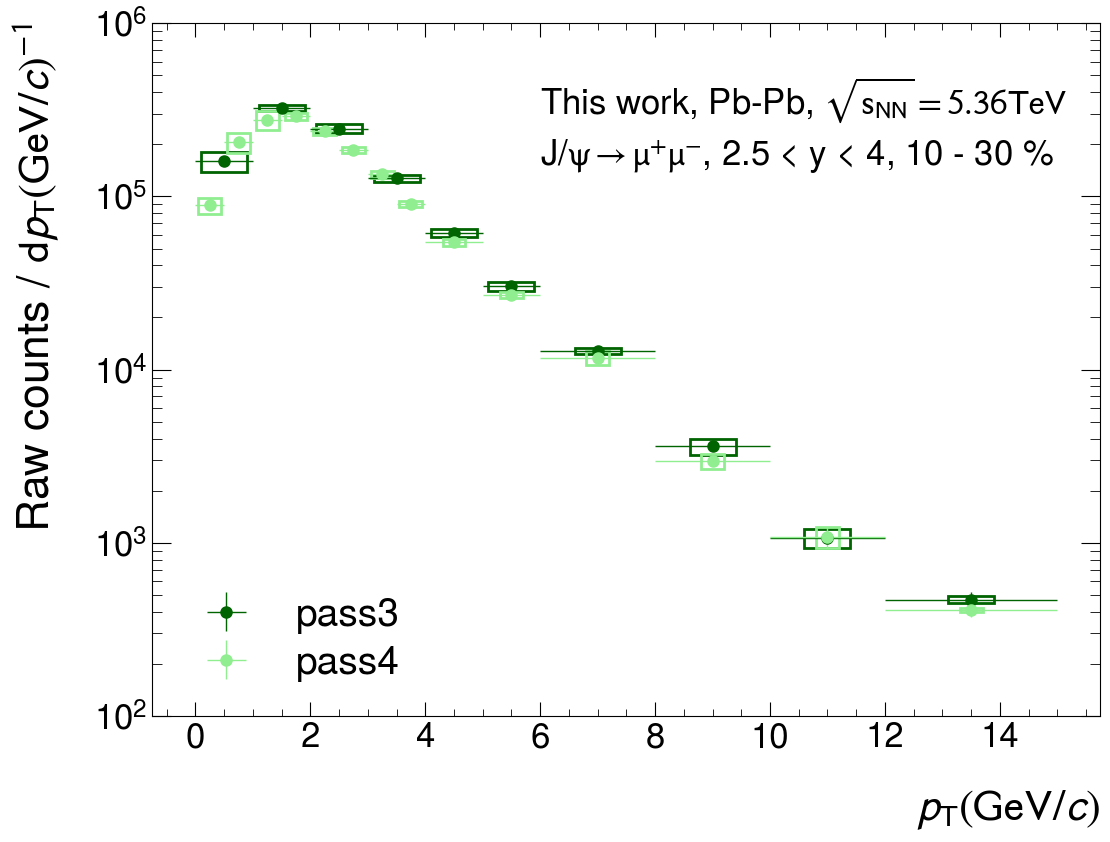

In [55]:
# Creating histogram
fig, ax = plt.subplots()
plot_syst(pt, 0.4, sigJpsiVsPtCentr1030, systSigJpsiVsPtCentr1030, ax, 'darkgreen', 2)
plot_syst(ptPass4, 0.2, sigJpsiPass4VsPtCentr1030, systSigJpsiPass4VsPtCentr1030, ax, 'lightgreen', 2)

plt.xlabel(r'$\it{p}_{\rm{T}} (\rm{GeV}/\it{c})$') 
plt.ylabel(r'Raw counts / $\rm{d}\it{p}_{\rm{T}} (\rm{GeV}/\it{c})^{-1}$') 
plt.yscale('log')
plt.ylim(1e2, 1e6)
plt.errorbar(pt, sigJpsiVsPtCentr1030, xerr=errPt, yerr=statSigJpsiVsPtCentr1030, label="pass3", fmt='o', color='darkgreen', ecolor='darkgreen')
plt.errorbar(ptPass4, sigJpsiPass4VsPtCentr1030, xerr=errPtPass4, yerr=statSigJpsiPass4VsPtCentr1030, label="pass4", fmt='o', color='lightgreen', ecolor='lightgreen')
plt.legend(loc='lower left')
plt.text(6, 3e5, r'This work, Pb-Pb, $\sqrt{s_{\rm{NN}}} = 5.36 TeV$', fontsize=25)
plt.text(6, 1.5e5, r'J/$\psi\rightarrow\mu^{+}\mu^{-}$, 2.5 < y < 4, 10 - 30 %', fontsize=25)
plt.savefig("/Users/lucamicheletti/GITHUB/jpsi_flow_run3/figures/sig_jpsi_vs_pt_vs_centrality.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [45]:
print("--- J/psi signal extraction vs pt in 10-50% ---")
for id, val in enumerate(sigJpsiVsPtCentr1050):

    sigCentr1050 = sigJpsiVsPtCentr1050[id]
    statCentr1050 = statSigJpsiVsPtCentr1050[id]
    systCentr1050 = systSigJpsiVsPtCentr1050[id]
    relStatCentr1050 = (statCentr1050 / sigCentr1050) * 100
    relSystCentr1050 = (systCentr1050 / sigCentr1050) * 100

    output = (
        f'{ptMin[id]} - {ptMax[id]} & '
        f'{sigCentr1050:.0f} $\pm$ {statCentr1050:.0f} ({relStatCentr1050:.1f}\%) $\pm$ {systCentr1050:.0f} ({relSystCentr1050:.1f}\%) \\'
    )

    print(output)

--- J/psi signal extraction vs pt in 10-50% ---
0.0 - 1.0 & 229578 $\pm$ 3009 (1.3\%) $\pm$ 12097 (5.3\%) \
1.0 - 2.0 & 431296 $\pm$ 3369 (0.8\%) $\pm$ 20773 (4.8\%) \
2.0 - 3.0 & 329649 $\pm$ 2169 (0.7\%) $\pm$ 16277 (4.9\%) \
3.0 - 4.0 & 175723 $\pm$ 1681 (1.0\%) $\pm$ 10775 (6.1\%) \
4.0 - 5.0 & 90512 $\pm$ 1384 (1.5\%) $\pm$ 7533 (8.3\%) \
5.0 - 6.0 & 44224 $\pm$ 924 (2.1\%) $\pm$ 3349 (7.6\%) \
6.0 - 8.0 & 19024 $\pm$ 357 (1.9\%) $\pm$ 835 (4.4\%) \
8.0 - 10.0 & 5402 $\pm$ 165 (3.1\%) $\pm$ 252 (4.7\%) \
10.0 - 12.0 & 1681 $\pm$ 117 (6.9\%) $\pm$ 110 (6.5\%) \
12.0 - 15.0 & 706 $\pm$ 50 (7.1\%) $\pm$ 16 (2.3\%) \


In [6]:
print("--- J/psi signal extraction vs pt in 10-30% & 30-50% ---")
for id, val in enumerate(sigJpsiVsPtCentr1030):

    sigCentr1030 = sigJpsiVsPtCentr1030[id]
    statCentr1030 = statSigJpsiVsPtCentr1030[id]
    systCentr1030 = systSigJpsiVsPtCentr1030[id]
    relStatCentr1030 = (statCentr1030 / sigCentr1030) * 100
    relSystCentr1030 = (systCentr1030 / sigCentr1030) * 100

    sigCentr3050 = sigJpsiVsPtCentr3050[id]
    statCentr3050 = statSigJpsiVsPtCentr3050[id]
    systCentr3050 = systSigJpsiVsPtCentr3050[id]
    relStatCentr3050 = (statCentr3050 / sigCentr3050) * 100
    relSystCentr3050 = (systCentr3050 / sigCentr3050) * 100

    output = (
        f'{ptMin[id]} - {ptMax[id]} & '
        f'{sigCentr1030:.0f} $\pm$ {statCentr1030:.0f} ({relStatCentr1030:.1f}\%) $\pm$ {systCentr1030:.0f} ({relSystCentr1030:.1f}\%) & '
        f'{sigCentr3050:.0f} $\pm$ {statCentr3050:.0f} ({relStatCentr3050:.1f}\%) $\pm$ {systCentr3050:.0f} ({relSystCentr3050:.1f}\%) \\'
    )

    print(output)

--- J/psi signal extraction vs pt in 10-30% & 30-50% ---
0.0 - 1.0 & 159367 $\pm$ 2505 (1.6\%) $\pm$ 21444 (13.5\%) & 61008 $\pm$ 1456 (2.4\%) $\pm$ 3209 (5.3\%) \
1.0 - 2.0 & 323469 $\pm$ 3311 (1.0\%) $\pm$ 13843 (4.3\%) & 108801 $\pm$ 1614 (1.5\%) $\pm$ 3917 (3.6\%) \
2.0 - 3.0 & 246239 $\pm$ 1934 (0.8\%) $\pm$ 15413 (6.3\%) & 85578 $\pm$ 958 (1.1\%) $\pm$ 2692 (3.1\%) \
3.0 - 4.0 & 127070 $\pm$ 1703 (1.3\%) $\pm$ 5330 (4.2\%) & 48850 $\pm$ 658 (1.3\%) $\pm$ 1455 (3.0\%) \
4.0 - 5.0 & 61743 $\pm$ 1244 (2.0\%) $\pm$ 3383 (5.5\%) & 25708 $\pm$ 646 (2.5\%) $\pm$ 879 (3.4\%) \
5.0 - 6.0 & 30292 $\pm$ 831 (2.7\%) $\pm$ 1868 (6.2\%) & 14065 $\pm$ 382 (2.7\%) $\pm$ 309 (2.2\%) \
6.0 - 8.0 & 12814 $\pm$ 390 (3.0\%) $\pm$ 563 (4.4\%) & 6282 $\pm$ 187 (3.0\%) $\pm$ 183 (2.9\%) \
8.0 - 10.0 & 3603 $\pm$ 135 (3.7\%) $\pm$ 370 (10.3\%) & 1916 $\pm$ 76 (4.0\%) $\pm$ 85 (4.4\%) \
10.0 - 12.0 & 1072 $\pm$ 92 (8.6\%) $\pm$ 137 (12.8\%) & 590 $\pm$ 44 (7.4\%) $\pm$ 41 (6.9\%) \
12.0 - 15.0 & 469 $\pm$

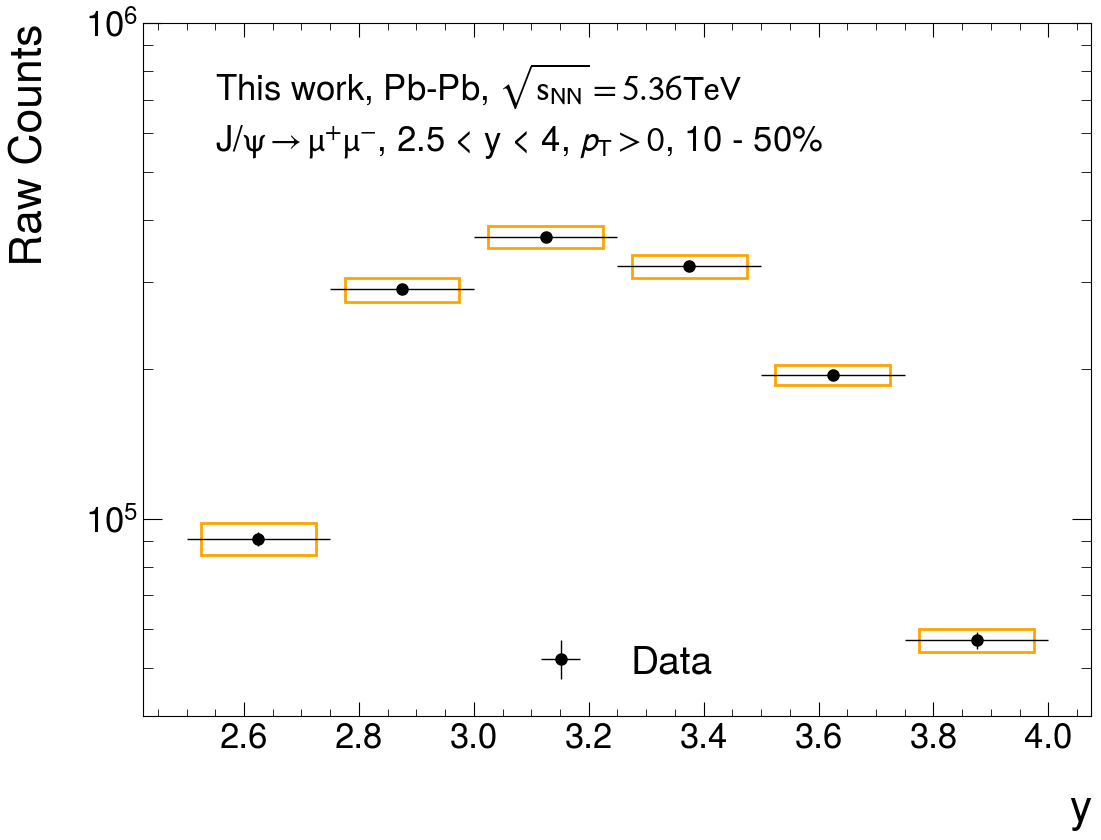

In [7]:
# Creating histogram
fig, ax = plt.subplots()
plot_syst(rap, 0.1, sig_jpsi_vs_rap, syst_sig_jpsi_vs_rap, ax, 'orange', 2)

plt.xlabel("y") 
plt.ylabel("Raw Counts") 
plt.yscale('log')
plt.ylim(4e4, 1e6)
plt.errorbar(rap, sig_jpsi_vs_rap, xerr=err_rap, yerr=stat_sig_jpsi_vs_rap, label="Data", fmt='o', color='black', ecolor='black')
#plt.errorbar(rap, sig_jpsi_vs_rap, yerr=syst_sig_jpsi_vs_rap, label="syst. error", fmt='o', color='black', ecolor='orange', alpha=0.5, elinewidth=50, capsize=0)
plt.legend(loc='lower center')
plt.text(2.55, 7e5, r'This work, Pb-Pb, $\sqrt{s_{\rm{NN}}} = 5.36 TeV$', fontsize=25)
plt.text(2.55, 5.5e5, r'J/$\psi\rightarrow\mu^{+}\mu^{-}$, 2.5 < y < 4, $\it{p}_{\rm{T}} > 0$, 10 - 50%', fontsize=25)
plt.savefig("/Users/lucamicheletti/GITHUB/jpsi_flow_run3/figures/sig_jpsi_vs_y_centr_10_50.pdf", format="pdf", bbox_inches="tight")
plt.show()